# Stock Market Prediction and Forecasting using Stacked LSTM

In [2]:
import pandas_datareader as pdr

In [4]:
# !pip install python-dotenv

['Collecting python-dotenv',
 '  Downloading python_dotenv-1.0.0-py3-none-any.whl (19 kB)',
 'Installing collected packages: python-dotenv',
 'Successfully installed python-dotenv-1.0.0']

In [5]:
from dotenv import load_dotenv
import os

# Load variables from .env file
load_dotenv('.env')

# Access the API key
api_key = os.getenv('API_KEY')

In [22]:
df=pdr.get_data_tiingo('AAPL',api_key=api_key)

In [9]:
import pandas as pd

In [23]:
df.to_csv('AAPL.csv')

In [24]:
df=pd.read_csv('AAPL.csv')

In [25]:
df.sample(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
951,AAPL,2022-03-08 00:00:00+00:00,157.44,162.88,155.8000,158.82,131148280,156.275538,161.675302,154.647667,157.645331,131148280,0.0,1.0
27,AAPL,2018-07-06 00:00:00+00:00,187.97,188.43,185.2000,185.42,17485245,44.905787,45.015681,44.244038,44.296596,69940980,0.0,1.0
1021,AAPL,2022-06-16 00:00:00+00:00,130.06,132.39,129.0400,132.08,107961508,129.286834,131.602983,128.272898,131.294826,107961508,0.0,1.0
107,AAPL,2018-10-29 00:00:00+00:00,212.24,219.69,206.0900,219.19,45935520,50.882213,52.668268,49.407817,52.548399,183742080,0.0,1.0
729,AAPL,2021-04-21 00:00:00+00:00,133.50,133.75,131.3001,132.36,68847136,131.730316,131.977002,129.559578,130.605428,68847136,0.0,1.0


In [26]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2023-05-22 00:00:00+00:00,174.20,174.7100,173.450,173.98,43570932,174.20,174.7100,173.450,173.98,43570932,0.0,1.0
1255,AAPL,2023-05-23 00:00:00+00:00,171.56,173.3794,171.275,173.13,50747263,171.56,173.3794,171.275,173.13,50747263,0.0,1.0
1256,AAPL,2023-05-24 00:00:00+00:00,171.84,172.4183,170.520,171.09,45143488,171.84,172.4183,170.520,171.09,45143488,0.0,1.0
1257,AAPL,2023-05-25 00:00:00+00:00,172.99,173.8950,171.690,172.41,56058258,172.99,173.8950,171.690,172.41,56058258,0.0,1.0
1258,AAPL,2023-05-26 00:00:00+00:00,175.43,175.7700,173.110,173.32,54834975,175.43,175.7700,173.110,173.32,54834975,0.0,1.0


In [27]:
df1=df['close']

In [28]:
df1.shape

(1259,)

In [29]:
#plotting close price 

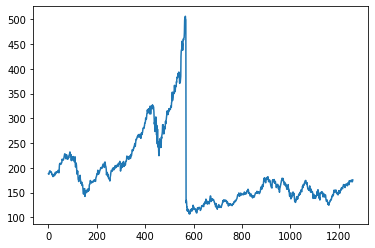

In [30]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [31]:
df1

0       187.90
1       187.50
2       186.87
3       190.24
4       191.83
         ...  
1254    174.20
1255    171.56
1256    171.84
1257    172.99
1258    175.43
Name: close, Length: 1259, dtype: float64

In [32]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-29 00:00:00+00:00,187.90,188.75,186.87,187.60,22514075,44.889064,45.092128,44.642999,44.817395,90056300,0.0,1.0
1,AAPL,2018-05-30 00:00:00+00:00,187.50,188.00,186.78,187.72,18690547,44.793505,44.912954,44.621498,44.846063,74762188,0.0,1.0
2,AAPL,2018-05-31 00:00:00+00:00,186.87,188.23,186.14,187.22,27482793,44.642999,44.967901,44.468603,44.726613,109931172,0.0,1.0
3,AAPL,2018-06-01 00:00:00+00:00,190.24,190.26,187.75,187.99,23442510,45.448087,45.452865,44.853230,44.910565,93770040,0.0,1.0
4,AAPL,2018-06-04 00:00:00+00:00,191.83,193.42,191.35,191.64,26266174,45.827936,46.207785,45.713265,45.782545,105064696,0.0,1.0


In [33]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2023-05-22 00:00:00+00:00,174.20,174.7100,173.450,173.98,43570932,174.20,174.7100,173.450,173.98,43570932,0.0,1.0
1255,AAPL,2023-05-23 00:00:00+00:00,171.56,173.3794,171.275,173.13,50747263,171.56,173.3794,171.275,173.13,50747263,0.0,1.0
1256,AAPL,2023-05-24 00:00:00+00:00,171.84,172.4183,170.520,171.09,45143488,171.84,172.4183,170.520,171.09,45143488,0.0,1.0
1257,AAPL,2023-05-25 00:00:00+00:00,172.99,173.8950,171.690,172.41,56058258,172.99,173.8950,171.690,172.41,56058258,0.0,1.0
1258,AAPL,2023-05-26 00:00:00+00:00,175.43,175.7700,173.110,173.32,54834975,175.43,175.7700,173.110,173.32,54834975,0.0,1.0


In [ ]:
#scaling data of lstm because lstm are sensitive to scale of data

In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
df1.shape

(1259, 1)

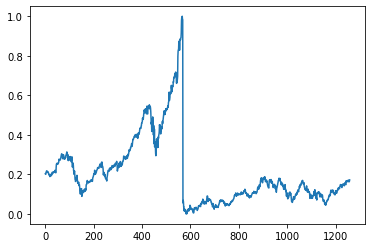

In [37]:
plt.plot(df1)
plt.show()

In [38]:
#In lstm lets say if we keep 1month data as train data 
#then rest of data becomes test data i.e 31st data get predicted
#on previous 30 days and this pattern follows for rest of data 
#also learnig happens on the data available and data predicted

In [40]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [41]:
training_size,test_size

(818, 441)

In [42]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1): #0,1,2...,99
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0]) #100
    return np.array(dataX),np.array(dataY)

In [43]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [44]:
X_train

array([[0.20303068, 0.2020288 , 0.20045085, ..., 0.27681904, 0.28881653,
        0.28641202],
       [0.2020288 , 0.20045085, 0.20889167, ..., 0.28881653, 0.28641202,
        0.27346274],
       [0.20045085, 0.20889167, 0.21287414, ..., 0.28641202, 0.27346274,
        0.28170319],
       ...,
       [0.03271133, 0.0383469 , 0.04047589, ..., 0.10857858, 0.0989856 ,
        0.09983719],
       [0.0383469 , 0.04047589, 0.04773951, ..., 0.0989856 , 0.09983719,
        0.10356919],
       [0.04047589, 0.04773951, 0.04851597, ..., 0.09983719, 0.10356919,
        0.10737633]])

In [45]:
X_train.shape

(717, 100)

In [46]:
y_train.shape

(717,)

In [48]:
# for Lstm reshape input to be [samples, time steps, features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [49]:
X_train.shape

(717, 100, 1)

In [50]:
#Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 32s 336ms/step - loss: 0.0340 - val_loss: 8.4821e-04
Epoch 2/100
12/12 [==============================] - 1s 63ms/step - loss: 0.0123 - val_loss: 0.0013
Epoch 3/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0098 - val_loss: 5.0279e-04
Epoch 4/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0083 - val_loss: 4.6243e-04
Epoch 5/100
12/12 [==============================] - 3s 308ms/step - loss: 0.0076 - val_loss: 5.0706e-04
Epoch 6/100
12/12 [==============================] - 3s 305ms/step - loss: 0.0072 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 2s 213ms/step - loss: 0.0073 - val_loss: 6.1578e-04
Epoch 8/100
12/12 [==============================] - 53s 5s/step - loss: 0.0062 - val_loss: 0.0012
Epoch 9/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0056 - val_loss: 3.4356e-04
Epoch 10/100
12/12 [==============================] - 1s 96ms/step - l

12/12 [==============================] - 1s 103ms/step - loss: 0.0012 - val_loss: 2.7657e-04
Epoch 80/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0013 - val_loss: 1.8195e-04
Epoch 81/100
12/12 [==============================] - 1s 74ms/step - loss: 0.0016 - val_loss: 1.9201e-04
Epoch 82/100
12/12 [==============================] - 1s 72ms/step - loss: 0.0012 - val_loss: 2.0575e-04
Epoch 83/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0013 - val_loss: 1.9668e-04
Epoch 84/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0030 - val_loss: 2.4612e-04
Epoch 85/100
12/12 [==============================] - 1s 76ms/step - loss: 0.0029 - val_loss: 2.7423e-04
Epoch 86/100
12/12 [==============================] - 1s 66ms/step - loss: 0.0024 - val_loss: 1.7985e-04
Epoch 87/100
12/12 [==============================] - 1s 63ms/step - loss: 0.0022 - val_loss: 2.1256e-04
Epoch 88/100
12/12 [==============================] - 1s 77ms/step

In [58]:
train_predict=model.predict(X_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 17ms/step


In [59]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

228.08680837202837

In [61]:
math.sqrt(mean_squared_error(y_test,test_predict))

156.99812938671687

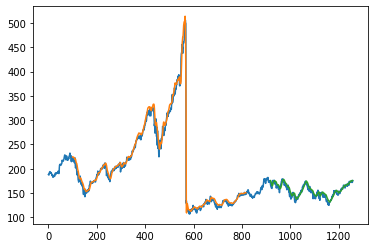

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()